## Interaction and Concurrency

A102462 - João Afonso Almeida Sousa

### 2x2 Binary Sudoku



#### **Grover's Algorithm**

In [126]:
#!pip install pennylane


In [127]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

In [128]:
# Definimos as soluções válidas para o Sudoku binário 2x2
# As soluções são: 0110 (6) e 1001 (9) em decimal
valid_solutions = [6, 9]  

n_qubits = 4  # 4 células, cada uma representada por 1 qubit

dev = qml.device("default.qubit", wires=n_qubits)

In [129]:
def int_to_bitstring(i, n):
    return format(i, f"0{n}b")

# Oracle que marca as soluções válidas com fase -1
def oracle():
    for s in valid_solutions:
        bitstring = int_to_bitstring(s, n_qubits)
        
        # Aplica X para bits 0 (prepara o estado)
        for i, bit in enumerate(bitstring):
            if bit == "0":
                qml.PauliX(wires=i)

        # Operador controlado-Z (marca a solução)
        controlled_z = qml.ctrl(qml.PauliZ, control=range(n_qubits - 1))
        controlled_z(wires=n_qubits - 1)

        # Desfaz X para bits 0
        for i, bit in enumerate(bitstring):
            if bit == "0":
                qml.PauliX(wires=i)


In [130]:
def diffuser():
    for i in range(n_qubits):
        qml.Hadamard(wires=i)
        qml.PauliX(wires=i)
    controlled_z = qml.ctrl(qml.PauliZ, control=range(n_qubits - 1))
    controlled_z(wires=n_qubits - 1)
    for i in range(n_qubits):
        qml.PauliX(wires=i)
        qml.Hadamard(wires=i)


In [131]:
# Circuito de Grover completo com 1 iteração
@qml.qnode(dev)
def grover_circuit():
    # Inicializa em superposição uniforme
    for i in range(n_qubits):
        qml.Hadamard(wires=i)
    
    # Aplica oracle e diffuser
    oracle()
    diffuser()
    
    return qml.probs(wires=range(n_qubits))

In [132]:
probs = grover_circuit()
for i, p in enumerate(probs):
    if p > 1e-3:
        print(f"{int_to_bitstring(i, n_qubits)} (decimal {i}) -> {p:.4f}")

0000 (decimal 0) -> 0.0156
0001 (decimal 1) -> 0.0156
0010 (decimal 2) -> 0.0156
0011 (decimal 3) -> 0.0156
0100 (decimal 4) -> 0.0156
0101 (decimal 5) -> 0.0156
0110 (decimal 6) -> 0.3906
0111 (decimal 7) -> 0.0156
1000 (decimal 8) -> 0.0156
1001 (decimal 9) -> 0.3906
1010 (decimal 10) -> 0.0156
1011 (decimal 11) -> 0.0156
1100 (decimal 12) -> 0.0156
1101 (decimal 13) -> 0.0156
1110 (decimal 14) -> 0.0156
1111 (decimal 15) -> 0.0156


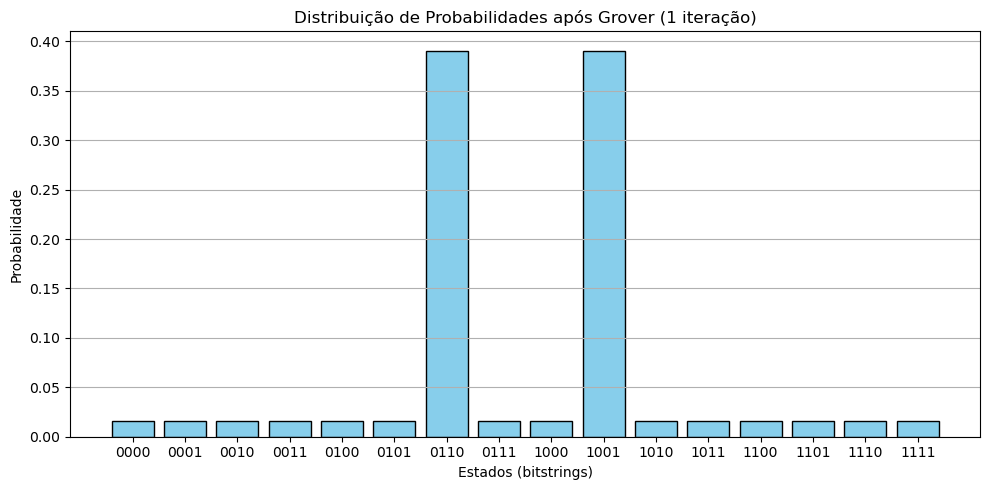

In [133]:
bitstrings = [int_to_bitstring(i, n_qubits) for i in range(2**n_qubits)]

plt.figure(figsize=(10, 5))
plt.bar(bitstrings, probs, color="skyblue", edgecolor="black")
plt.xlabel("Estados (bitstrings)")
plt.ylabel("Probabilidade")
plt.title("Distribuição de Probabilidades após Grover (1 iteração)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### **Assess the algorithm's efficiency and complexity**


O algoritmo de Grover é um dos algoritmos quânticos mais importantes, oferecendo uma vantagem quadrática em problemas de busca não estruturada.

No caso do sudoku binário 2x2:
- **Espaço de busca clássico:**
Existem $N = 2^4 = 16$ estados possíveis (4 células binárias). Um algoritmo clássico precisaria de verificar, **no pior caso**, até **16** estados.

- **Grover quântico:**
Com $M = 2$ soluções válidas, o número ótimo de iterações é 
$$
r \approx \left\lfloor \frac{\pi}{4} \sqrt{\frac{N}{M}} \right\rfloor
= \left\lfloor \frac{\pi}{4} \sqrt{8} \right\rfloor \approx 2
$$
 
Na prática, com apenas **1 iteração**, o algoritmo já amplifica significativamente as probabilidades dos estados solução *(como visto no gráfico)*.

##### Comparação direta

- **Clássico**: tempo de execução $O(N)$ = $O(16)$ no pior caso (verifica todas as possibilidades).
- **Grover (quântico)**: tempo de execução $O\left(\sqrt{\frac{N}{M}}\right)$ = $O\left(\sqrt{8}\right) \approx 3$, o que representa uma **vantagem quadrática**.


##### Limitações

- Apesar da melhoria teórica, a vantagem só é significativa para instâncias maiores. Para sudoku 2x2, o problema é trivial também para um algoritmo clássico.

- O algoritmo assume um oráculo eficiente (que marca as soluções). A construção deste oráculo pode ser complexa em problemas reais ou maiores.

- Com mais soluções $M$, o número ótimo de iterações muda. Se forem aplicadas demasiadas iterações, a probabilidade começa a **decrescer** novamente.

##### Conclusão

O **algoritmo de Grover** mostra-se **eficiente** mesmo em problemas pequenos como o sudoku binário 2x2, mas a sua verdadeira força está em problemas com um espaço de busca muito maior, onde a vantagem quadrática é mais significativa.

#### **Propose a generalization for 3x3 sudoku and discuss potential limitations and resources required.**

O sudoku 3x3 consiste numa grelha de 3 linhas por 3 colunas, onde cada célula pode assumir valores do conjunto {1,2,3}. Contém restrições como:
- Cada linha deve conter números distintos.
- Cada coluna deve conter números distintos.
Ou seja, consiste num **quadrado latino** de ordem 3.

##### Generalização 

Para generalizar para um Sudoku 3x3 (valores 1,2,3):
- **Representação Quântica:**
Cada célula requer 2 qubits (para representar 3 valores)

##### Limitações

- Para valores maiores que $n$, o espaço de soluções cresce exponencialmente, tornando a resolução por brute-force impraticável.
- A complexidade computacional aumenta com o tamanho de $n$, podendo exigir algoritmos eficientes para resolver ou gerar soluções.


##### Recursos Necessários

- Algoritmos de backtracking simples são suficientes para gerar e resolver o Sudoku 3x3 e de variantes pequenas;
- Para valores maiores de $n$, pode ser necessário o uso de técnicas avançadas, como algoritmos baseados em programação por restrições (CSP);
- Em termos de recursos computacionais, a memória e o tempo de processamento aumentam rapidamente com $n$, necessitando de maior capacidade para valores maiores.